In [0]:
import torch
import torch.nn.functional as f
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('data'.format(
      name=fn, length=len(uploaded[fn])))

Saving Salary_Data.csv to Salary_Data.csv
data


In [0]:
data=pd.read_csv("Salary_Data.csv")

In [0]:
x_train = np.array([data['YearsExperience'].values],dtype=np.float32)

y_train = np.array([data['Salary'].values], dtype=np.float32)

x_train = x_train.reshape(-1, 1).astype('float32')
y_train = y_train.reshape(-1, 1).astype('float32')

In [0]:
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.02

In [8]:
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/1000], Loss: 161997504.00
Epoch [10/1000], Loss: 136940144.00
Epoch [15/1000], Loss: 128324400.00
Epoch [20/1000], Loss: 120418456.00
Epoch [25/1000], Loss: 113156528.00
Epoch [30/1000], Loss: 106486176.00
Epoch [35/1000], Loss: 100359184.00
Epoch [40/1000], Loss: 94731280.00
Epoch [45/1000], Loss: 89561824.00
Epoch [50/1000], Loss: 84813472.00
Epoch [55/1000], Loss: 80451928.00
Epoch [60/1000], Loss: 76445656.00
Epoch [65/1000], Loss: 72765728.00
Epoch [70/1000], Loss: 69385576.00
Epoch [75/1000], Loss: 66280792.00
Epoch [80/1000], Loss: 63428892.00
Epoch [85/1000], Loss: 60809320.00
Epoch [90/1000], Loss: 58403144.00
Epoch [95/1000], Loss: 56192960.00
Epoch [100/1000], Loss: 54162820.00
Epoch [105/1000], Loss: 52298064.00
Epoch [110/1000], Loss: 50585204.00
Epoch [115/1000], Loss: 49011864.00
Epoch [120/1000], Loss: 47566700.00
Epoch [125/1000], Loss: 46239256.00
Epoch [130/1000], Loss: 45019948.00
Epoch [135/1000], Loss: 43899968.00
Epoch [140/1000], Loss: 42871216.00
Epoch

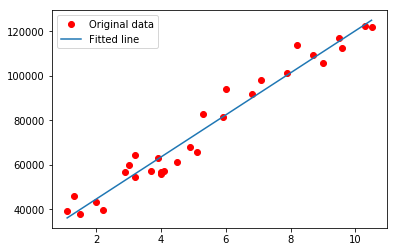

In [9]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
